# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [2]:
# beer dataset
import pandas as pd
beer = pd.read_csv('C:\\Users\\ChandraMouli\\Desktop\\segmentation\\beer.txt', sep=' ')
beer

name  calories  sodium  alcohol  cost
0              Budweiser       144      15      4.7  0.43
1                Schlitz       151      19      4.9  0.43
2              Lowenbrau       157      15      0.9  0.48
3            Kronenbourg       170       7      5.2  0.73
4               Heineken       152      11      5.0  0.77
5          Old_Milwaukee       145      23      4.6  0.28
6             Augsberger       175      24      5.5  0.40
7   Srohs_Bohemian_Style       149      27      4.7  0.42
8            Miller_Lite        99      10      4.3  0.43
9        Budweiser_Light       113       8      3.7  0.40
10                 Coors       140      18      4.6  0.44
11           Coors_Light       102      15      4.1  0.46
12        Michelob_Light       135      11      4.2  0.50
13                 Becks       150      19      4.7  0.76
14                 Kirin       149       6      5.0  0.79
15     Pabst_Extra_Light        68      15      2.3  0.38
16                 Hamms       139      19      4.4  0.43
17   Heilemans_Old_Style       144      24      4.9  0.43
18   Olympia_Goled_Light        72       6      2.9  0.46
19         Schlitz_Light        97       7      4.2  0.47

How would you cluster these beers?

In [3]:
# define X
X = beer.drop('name', axis=1)

What happened to y?

## Part 1: K-means clustering

In [4]:
from sklearn.cluster import KMeans

In [5]:
KMeans?

In [6]:
# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [7]:
km.inertia_

2427.5071642857142

In [4]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [8]:
# save the cluster labels and sort by cluster
beer['cluster3'] = km.labels_
beer.sort('cluster3')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


name  calories  sodium  alcohol  cost  cluster3
0              Budweiser       144      15      4.7  0.43         0
1                Schlitz       151      19      4.9  0.43         0
2              Lowenbrau       157      15      0.9  0.48         0
3            Kronenbourg       170       7      5.2  0.73         0
4               Heineken       152      11      5.0  0.77         0
5          Old_Milwaukee       145      23      4.6  0.28         0
6             Augsberger       175      24      5.5  0.40         0
7   Srohs_Bohemian_Style       149      27      4.7  0.42         0
17   Heilemans_Old_Style       144      24      4.9  0.43         0
16                 Hamms       139      19      4.4  0.43         0
10                 Coors       140      18      4.6  0.44         0
14                 Kirin       149       6      5.0  0.79         0
12        Michelob_Light       135      11      4.2  0.50         0
13                 Becks       150      19      4.7  0.76         0
9        Budweiser_Light       113       8      3.7  0.40         1
8            Miller_Lite        99      10      4.3  0.43         1
11           Coors_Light       102      15      4.1  0.46         1
19         Schlitz_Light        97       7      4.2  0.47         1
15     Pabst_Extra_Light        68      15      2.3  0.38         2
18   Olympia_Goled_Light        72       6      2.9  0.46         2

What do the clusters seem to be based on? Why?

In [6]:
# review the cluster centers
km.cluster_centers_

array([[ 150.        ,   17.        ,    4.52142857,    0.52071429],
       [ 102.75      ,   10.        ,    4.075     ,    0.44      ],
       [  70.        ,   10.5       ,    2.6       ,    0.42      ]])

In [10]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster3').mean()

calories  sodium   alcohol      cost
cluster3                                      
0           150.00    17.0  4.521429  0.520714
1           102.75    10.0  4.075000  0.440000
2            70.00    10.5  2.600000  0.420000

In [11]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster3').mean()

In [12]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [13]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

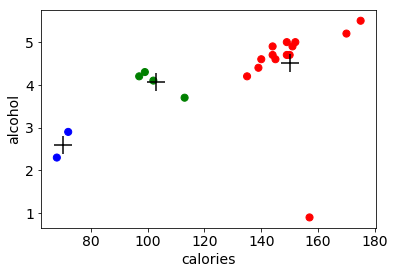

In [15]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster3], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA4B160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6BB320>]], dtype=object)

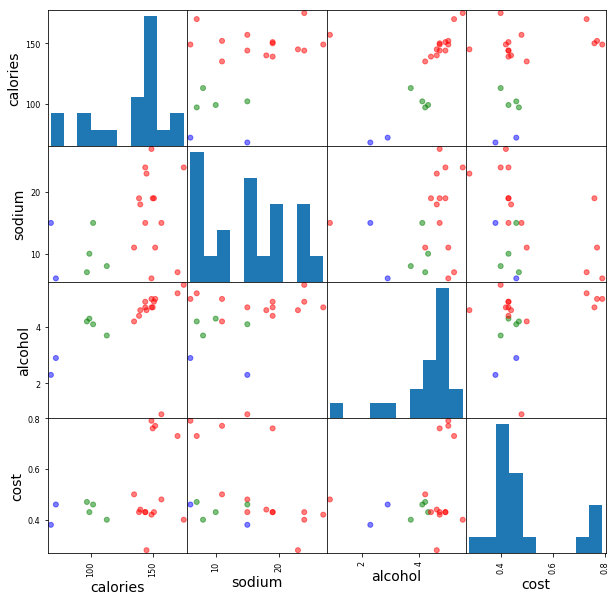

In [16]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster3], figsize=(10,10), s=100)

### Repeat with scaled data

In [17]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
pd.DataFrame(X_scaled).describe()

0             1             2             3
count  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01
mean  -3.219647e-16  7.771561e-17 -1.003711e-15 -3.608225e-16
std    1.025978e+00  1.025978e+00  1.025978e+00  1.025978e+00
min   -2.186883e+00 -1.395248e+00 -3.149822e+00 -1.519224e+00
25%   -7.554993e-01 -8.496201e-01 -6.129894e-02 -4.745363e-01
50%    3.879133e-01  7.794680e-03  3.395018e-01 -4.214165e-01
75%    5.996564e-01  6.313691e-01  6.224200e-01 -6.728499e-02
max    1.438159e+00  1.878518e+00  1.188256e+00  2.092917e+00

In [21]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [22]:
# save the cluster labels and sort by cluster
beer['cluster_3_a'] = km.labels_
beer.sort('cluster_3_a')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


name  calories  sodium  alcohol  cost  cluster3  \
0              Budweiser       144      15      4.7  0.43         0   
1                Schlitz       151      19      4.9  0.43         0   
17   Heilemans_Old_Style       144      24      4.9  0.43         0   
16                 Hamms       139      19      4.4  0.43         0   
5          Old_Milwaukee       145      23      4.6  0.28         0   
6             Augsberger       175      24      5.5  0.40         0   
7   Srohs_Bohemian_Style       149      27      4.7  0.42         0   
10                 Coors       140      18      4.6  0.44         0   
15     Pabst_Extra_Light        68      15      2.3  0.38         2   
12        Michelob_Light       135      11      4.2  0.50         0   
11           Coors_Light       102      15      4.1  0.46         1   
9        Budweiser_Light       113       8      3.7  0.40         1   
8            Miller_Lite        99      10      4.3  0.43         1   
2              Lowenbrau       157      15      0.9  0.48         0   
18   Olympia_Goled_Light        72       6      2.9  0.46         2   
19         Schlitz_Light        97       7      4.2  0.47         1   
13                 Becks       150      19      4.7  0.76         0   
14                 Kirin       149       6      5.0  0.79         0   
4               Heineken       152      11      5.0  0.77         0   
3            Kronenbourg       170       7      5.2  0.73         0   

    cluster_3_a  
0             0  
1             0  
17            0  
16            0  
5             0  
6             0  
7             0  
10            0  
15            1  
12            1  
11            1  
9             1  
8             1  
2             1  
18            1  
19            1  
13            2  
14            2  
4             2  
3             2

What are the "characteristics" of each cluster?

In [23]:
# review the cluster centers
beer.groupby('cluster_3_a').mean()

calories  sodium  alcohol    cost  cluster3
cluster_3_a                                             
0             148.375  21.125   4.7875  0.4075         0
1             105.375  10.875   3.3250  0.4475         1
2             155.250  10.750   4.9750  0.7625         0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DBEC2E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E92F780>]], dtype=object)

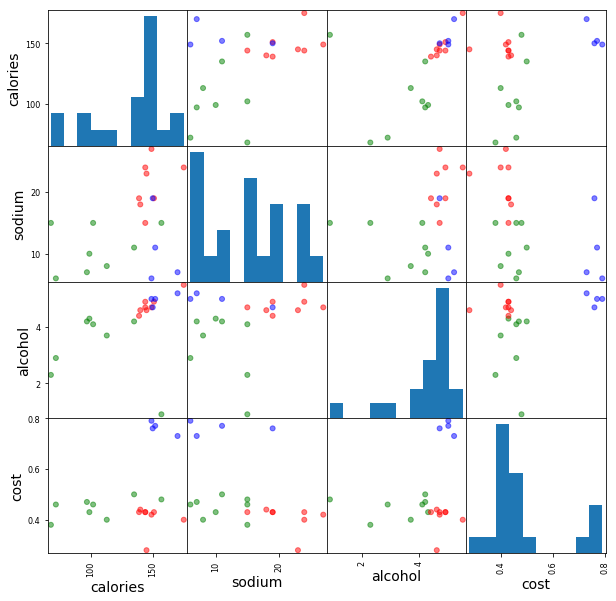

In [25]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster_3_a], figsize=(10,10), s=100)

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [26]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.45777415910909475

In [27]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

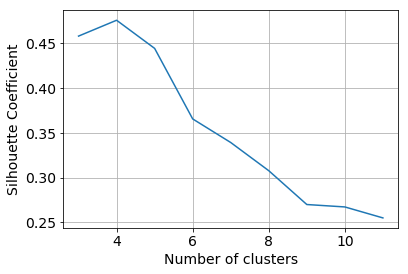

In [28]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [29]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
beer['cluster4'] = km.labels_
beer.sort('cluster4')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


name  calories  sodium  alcohol  cost  cluster3  \
0              Budweiser       144      15      4.7  0.43         0   
1                Schlitz       151      19      4.9  0.43         0   
17   Heilemans_Old_Style       144      24      4.9  0.43         0   
16                 Hamms       139      19      4.4  0.43         0   
5          Old_Milwaukee       145      23      4.6  0.28         0   
6             Augsberger       175      24      5.5  0.40         0   
7   Srohs_Bohemian_Style       149      27      4.7  0.42         0   
10                 Coors       140      18      4.6  0.44         0   
15     Pabst_Extra_Light        68      15      2.3  0.38         2   
12        Michelob_Light       135      11      4.2  0.50         0   
11           Coors_Light       102      15      4.1  0.46         1   
9        Budweiser_Light       113       8      3.7  0.40         1   
8            Miller_Lite        99      10      4.3  0.43         1   
18   Olympia_Goled_Light        72       6      2.9  0.46         2   
19         Schlitz_Light        97       7      4.2  0.47         1   
13                 Becks       150      19      4.7  0.76         0   
14                 Kirin       149       6      5.0  0.79         0   
4               Heineken       152      11      5.0  0.77         0   
3            Kronenbourg       170       7      5.2  0.73         0   
2              Lowenbrau       157      15      0.9  0.48         0   

    cluster_3_a  cluster4  
0             0         0  
1             0         0  
17            0         0  
16            0         0  
5             0         0  
6             0         0  
7             0         0  
10            0         0  
15            1         1  
12            1         1  
11            1         1  
9             1         1  
8             1         1  
18            1         1  
19            1         1  
13            2         2  
14            2         2  
4             2         2  
3             2         2  
2             1         3

## Part 3: DBSCAN clustering
### Density-based spatial clustering of applications with noise (DBSCAN) 

In [22]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, p=None, random_state=None)

In [23]:
# review the cluster labels
db.labels_

array([ 0,  0, -1,  1,  1, -1, -1,  0,  2,  2,  0,  2,  0, -1,  1, -1,  0,
        0, -1,  2], dtype=int64)

In [24]:
# save the cluster labels and sort by cluster
beer['cluster'] = db.labels_
beer.sort('cluster')

name  calories  sodium  alcohol  cost  cluster
2              Lowenbrau       157      15      0.9  0.48       -1
5          Old_Milwaukee       145      23      4.6  0.28       -1
6             Augsberger       175      24      5.5  0.40       -1
18   Olympia_Goled_Light        72       6      2.9  0.46       -1
13                 Becks       150      19      4.7  0.76       -1
15     Pabst_Extra_Light        68      15      2.3  0.38       -1
0              Budweiser       144      15      4.7  0.43        0
1                Schlitz       151      19      4.9  0.43        0
7   Srohs_Bohemian_Style       149      27      4.7  0.42        0
17   Heilemans_Old_Style       144      24      4.9  0.43        0
10                 Coors       140      18      4.6  0.44        0
16                 Hamms       139      19      4.4  0.43        0
12        Michelob_Light       135      11      4.2  0.50        0
3            Kronenbourg       170       7      5.2  0.73        1
4               Heineken       152      11      5.0  0.77        1
14                 Kirin       149       6      5.0  0.79        1
9        Budweiser_Light       113       8      3.7  0.40        2
8            Miller_Lite        99      10      4.3  0.43        2
11           Coors_Light       102      15      4.1  0.46        2
19         Schlitz_Light        97       7      4.2  0.47        2

In [25]:
# review the cluster centers
beer.groupby('cluster').mean()

calories  sodium   alcohol      cost
cluster                                        
-1       127.833333      17  3.483333  0.460000
 0       143.142857      19  4.628571  0.440000
 1       157.000000       8  5.066667  0.763333
 2       102.750000      10  4.075000  0.440000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001C074320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001F73D748>]], dtype=object)

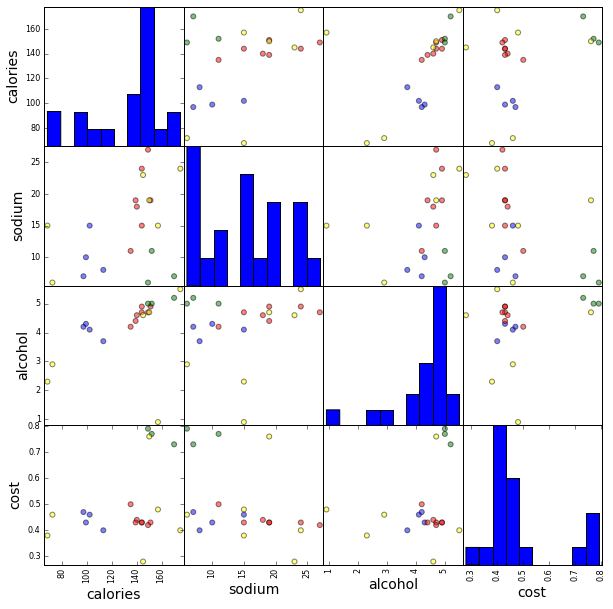

In [26]:
# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)